
# Data Wrangling of Twitter @WeRateDogs

### Table of Contents

#### Introduction
#### Gathering Data
#### Assessing Data
#### Cleaning Data
#### Analyzing and Visualizing Data

### Introduction 

This analysis briefly presents the wrangling process for dataset of Twitter account @WeRateDogs. It is a Twitter account that rates people's dogs with funny comments. These ratings almost always have a denominator of 10. The project is comprised of the following parts: Gathering, Assessing,  and Cleaning data. The aim of this project is to apply what we have learned in data wrangling, assessing, and cleaning from the Udacity Professional Data Analysis Nanodegree program. 


We start with the first step, which is gathering
### Gathering

The gathered data are  from three difference sources as follows: 

•	First, the tweet archive of Twitter account @dog_rates, it is given by Udacity to download. twitter_archive_enhanced.csv

•	Second, tweet image predictions, which is a file (image_predictions.tsv) is hosted on Udacity's servers and should be downloaded programmatically using ag given URL

•	Third, Twitter API & JSON: by using the tweet IDs in the Twitter archive, I queried the Twitter API for each tweet's JSON data using Python's Tweepy library and stored each tweet's entire set of JSON data


We start here with the first type of fathered data. 
##### 1. Twitter Archived Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import tweepy
import json
import requests

In [2]:
tw_arch = pd.read_csv ("twitter-archive-enhanced.csv")
tw_arch.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [3]:
tw_arch.shape

(2356, 17)

In [4]:
tw_arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

Now, we are gathering from the second source, which is the image predictions data using the tsv file hosted on Udacity server.
#### 2. Tweet Image Predictions


In [5]:
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)
    
with open ("image_predictions.tsv", "wb") as file:
    file.write(response.content)

im_pred = pd.read_csv("image_predictions.tsv", sep="\t")
im_pred.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [6]:
im_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


After, second step. Now, it is time to proceed with the third source of data gathering. 
#### 3. Query Twitter API
At first I tried to import twitter API through the developer account, with the help of https://bdthemes.com/support/knowledge/details/240/How-to-Generate-API-Key-Consumer-Token-Access-Key-for-Twitter-OAuth.html and https://towardsdatascience.com/twitter-data-collection-tutorial-using-python-3267d7cfa93e and https://stackoverflow.com/questions/28384588/twitter-api-get-tweets-with-specific-id
     and https://stackoverflow.com/questions/28384588/twitter-api-get-tweets-with-specific-id
     

but I imported the json file provided by Udacity project. 

I wanted to document in the few following markdown cells my work that I have done, but always came out with an error that I still don't understand. I created a developer account and generated my fours keys. but still no way. 
At the end, I asked on the fwd community group but they advised to use the json file. 
I kep these cells to showcase my steps. 

#the following keys, I generated them from my developer.twitter account

consumer_key = "cccccccccccc"
consumer_secret = "ccccccc"
access_token = "ccccccccccccccccccccccc"
access_token_secret = "cccccccccc"

#we need to create variables for tweepy query, this I got it from udacity project details and the rest of API process with the help of stackoverflow
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

tweet_ids = tw_arch["tweet_id"]

we needd to create a list of tweets 
tweet_list = []

we also need to to create a list for errors
error_list = []


now we create a lope that will add tweets  to the tweet list
 
for tweet_id in tweet_ids:
    try: 
        tweet = api.get_status(tweet_id, tweet_mode= "extended")._json
        
        favorites= tweet["favorite_count"]
        retweets = tweet["retweet_count"]
        user_favourites = tweet["user"]["favourites_count"]
        user_followers = tweet ["user"]["followers_count"]
        date_time = tweet ["created_at"]
        
        tweet_list.append({"tweet_id": int(tweet_id),
                            "favorites" : int(favorites), 
                            "retweets": int(retweets),
                            "user_favourites": int(user_favourites),
                            "user_followers": int(user_followers),
                            "date_time" : pd.to_datetime(date_time)})
    except Exception as e:
        print(str(tweet_id)+ " _ " + str(e))
        error_list.append(tweet_id)

print("tweets list is", len(tweet_list))

print("errort list is", len(error_list))

#nowwe should create datafarem for json.txt file

tweets_json = pd.DataFrame(tweet_list, columns = ["tweet_id", "favourites", "retweets", "user_followers", "user_favourites", "date_time"])

#then we should save it to the json txt file

tweets_json.to_csv("tweet_json.txt", encoding = "utf-8", index=False) 

then we now read the json file and present it

api_data = pd.read_csv('tweet_json.txt', encoding = 'utf-8')
api_data.head()

In [7]:
#after getting the provided json file and uploading it, we should read it. 
tweet_list = []

with open("tweet_json.txt", "r") as file:
    for line in file:
        tweet = json.loads(line)
        tweet_id = tweet["id"]
        retweet_count = tweet["retweet_count"]
        fav_count = tweet["favorite_count"]
        user_count = tweet["user"]["followers_count"]
        user_favourites = tweet["user"]["favourites_count"]
        date_time = tweet["created_at"]
        tweet_list.append({"tweet_id":tweet_id,
                       "retweet_count": retweet_count,
                       "favorite_count": fav_count,
                       "user_count": user_count,
                        "date_time": pd.to_datetime(date_time)})
        
api_data = pd.DataFrame(tweet_list)
api_data.head(10)

,date_time,favorite_count,retweet_count,tweet_id,user_count
0,2017-08-01 16:23:56,39467,8853,892420643555336193,3200889
1,2017-08-01 00:17:27,33819,6514,892177421306343426,3200889
2,2017-07-31 00:18:03,25461,4328,891815181378084864,3200889
3,2017-07-30 15:58:51,42908,8964,891689557279858688,3200889
4,2017-07-29 16:00:24,41048,9774,891327558926688256,3200889
5,2017-07-29 00:08:17,20562,3261,891087950875897856,3200889
6,2017-07-28 16:27:12,12041,2158,890971913173991426,3200889
7,2017-07-28 00:22:40,56848,16716,890729181411237888,3200889
8,2017-07-27 16:25:51,28226,4429,890609185150312448,3200889
9,2017-07-26 15:59:51,32467,7711,890240255349198849,3200889


Until now, we are done with the part of gathering. We should begin with Assessing data part

### Assessing Data
In this second part of wrangling the data, we want to assess the data visualy  and programtically. First, we look at how the data look like as if it is in excel sheet. This shall be done for all gathered sources of data. Then, we should apply prgramatic assessment for each source. Lets begin with the first source
#### 1. Twitter Archived Data


In [8]:
tw_arch.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1616,685198997565345792,NaN,NaN,2016-01-07 20:39:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Alfie. That is his time machine. He's ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/685198997...,11,10,Alfie,None,None,None,None
259,843235543001513987,NaN,NaN,2017-03-18 22:59:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tycho. She just had new wheels install...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/843235543...,13,10,Tycho,None,None,None,None
2100,670704688707301377,NaN,NaN,2015-11-28 20:43:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Danny. He's too good to look at the road ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670704688...,6,10,Danny,None,None,None,None
2070,671122204919246848,NaN,NaN,2015-11-30 00:22:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Two miniature golden retrievers here. Webbed p...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671122204...,4,10,None,None,None,None,None
850,765719909049503744,NaN,NaN,2016-08-17 01:20:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Brat. He has a hard time being ferocio...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/765719909...,12,10,Brat,None,None,None,None
898,758854675097526272,NaN,NaN,2016-07-29 02:40:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lilli Bee &amp; Honey Bear. Unfortunat...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758854675...,11,10,Lilli,None,None,None,None
1998,672538107540070400,NaN,NaN,2015-12-03 22:09:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Darby. He's a Fiscal Tutankhamen Waxbeard...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672538107...,7,10,Darby,None,None,None,None
275,840696689258311684,NaN,NaN,2017-03-11 22:51:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I didn't even have to intervene. Took him 4 mi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/840696689...,10,10,None,None,None,None,None
1672,682389078323662849,NaN,NaN,2015-12-31 02:33:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Brody. He's a Downton Abbey Falsetto. Add...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/682389078...,9,10,Brody,None,None,None,None
430,821044531881721856,NaN,NaN,2017-01-16 17:20:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Flash. He went way too hard celebratin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/821044531...,12,10,Flash,None,None,None,None


In [9]:
tw_arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [10]:
tw_arch.duplicated().sum()

0

In [11]:
tw_arch.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [12]:
tw_arch.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

Let's assess the second source
#### 2. Image predictions

In [13]:
im_pred.head(4)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True


In [14]:
im_pred.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
611,680115823365742593,https://pbs.twimg.com/media/CXBBurSWMAELewi.jpg,1,pug,0.999365,True,French_bulldog,0.000544,True,Boston_bull,0.000028,True
1575,796031486298386433,https://pbs.twimg.com/media/CwwSaWJWIAASuoY.jpg,1,golden_retriever,0.893775,True,Labrador_retriever,0.070140,True,doormat,0.008419,False
2048,886983233522544640,https://pbs.twimg.com/media/DE8yicJW0AAAvBJ.jpg,2,Chihuahua,0.793469,True,toy_terrier,0.143528,True,can_opener,0.032253,False
1842,838476387338051585,https://pbs.twimg.com/media/C6Ld0wYWgAQQqMC.jpg,3,Great_Pyrenees,0.997692,True,kuvasz,0.001001,True,Newfoundland,0.000405,True
1777,828381636999917570,https://pbs.twimg.com/media/C38Asz1WEAAvzj3.jpg,1,Bedlington_terrier,0.392535,True,Labrador_retriever,0.089022,True,clumber,0.081800,True
1293,751598357617971201,https://pbs.twimg.com/media/Cm42t5vXEAAv4CS.jpg,1,toy_poodle,0.757756,True,miniature_poodle,0.035150,True,Scottish_deerhound,0.027698,True
1538,790723298204217344,https://pbs.twimg.com/media/CvaYgDOWgAEfjls.jpg,1,tub,0.479477,False,bathtub,0.325106,False,golden_retriever,0.078530,True
1126,727524757080539137,https://pbs.twimg.com/media/Chiv6BAW4AAiQvH.jpg,2,Pomeranian,0.958834,True,Chihuahua,0.024099,True,chow,0.003941,True
1074,717009362452090881,https://pbs.twimg.com/media/CfNUNetW8AAekHx.jpg,1,Siberian_husky,0.506154,True,Eskimo_dog,0.269656,True,malamute,0.060658,True
284,671141549288370177,https://pbs.twimg.com/media/CVBfrU9WUAApDeV.jpg,1,guinea_pig,0.387728,False,wood_rabbit,0.171681,False,borzoi,0.075358,True


In [15]:
im_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [16]:
im_pred.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


Let's assess the third source
#### 2. Twitter API json

In [17]:
api_data.sample(10)

,date_time,favorite_count,retweet_count,tweet_id,user_count
1314,2016-03-07 00:57:27,2814,1224,706644897839910912,3200947
340,2017-02-16 13:11:05,0,10723,832215726631055365,3200892
1601,2016-01-09 21:58:42,1801,696,685943807276412928,3200950
1015,2016-06-26 01:08:52,6593,2429,746872823977771008,3200943
244,2017-03-26 01:38:00,31737,9894,845812042753855489,3200891
2084,2015-11-29 03:16:46,362,95,670803562457407488,3201008
749,2016-09-23 01:00:13,13206,4207,779123168116150273,3200901
761,2016-09-20 01:12:28,9417,3065,778039087836069888,3200902
1411,2016-02-14 16:33:40,2787,699,698907974262222848,3200950
911,2016-07-25 02:20:45,16743,7759,757400162377592832,3200943


In [18]:
api_data.shape

(2354, 5)

In [19]:
api_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 5 columns):
date_time         2354 non-null datetime64[ns]
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
tweet_id          2354 non-null int64
user_count        2354 non-null int64
dtypes: datetime64[ns](1), int64(4)
memory usage: 92.0 KB


In [20]:
api_data.duplicated().sum()

0

In this step, we should look up the quality and tidiness issues. In the following items, I am trying to list both issues.

Tidiness issues: 
1. all of the three data sources have tweet_id,so this can help combining the three together in one dataset
2. drop all unncessary columns that are not relevant. 

Quality issues: 
3. remove the retweets 
4. fix columns datatype: tweet_id and timestamp
5. remove the tweets that have no image
6. fix the numerators and denominators ratings 
7. fix the outliers and high ratings
8. combine the numberator and denominator
9. combine the dog names to one column
10. fix missing values of NONE in column name




##  Cleaning
in the cleaning process, we will always work on three steps for tackling each quality and tidiness issue
The three steps are: Define, Code, Test. 
Lets begin with issue 1. 

#### Define
1. combine all three data sources in one dataset using tweet_id

In [21]:
#we need first to create copies of data, just in case to secure our dataset sources
tw_arch = tw_arch.copy()
im_pred = im_pred.copy()
api_data = api_data.copy()

#### Code

In [22]:
tw_arch = pd.merge(left=tw_arch, right = api_data, left_on = "tweet_id", right_on ="tweet_id", how="inner" )

In [23]:
tw_arch = tw_arch.merge(im_pred, on= "tweet_id", how="inner")

##### Test

In [24]:
tw_arch.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


In [25]:
tw_arch.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 32 columns):
tweet_id                      2073 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2073 non-null object
source                        2073 non-null object
text                          2073 non-null object
retweeted_status_id           79 non-null float64
retweeted_status_user_id      79 non-null float64
retweeted_status_timestamp    79 non-null object
expanded_urls                 2073 non-null object
rating_numerator              2073 non-null int64
rating_denominator            2073 non-null int64
name                          2073 non-null object
doggo                         2073 non-null object
floofer                       2073 non-null object
pupper                        2073 non-null object
puppo                         2073 non-null object
date_time                     2073 

##### Define:
2. drop unecessary columns with small values
that means to drop include few valuessuch as  in reply_to_user_id adn retweeted_status_....

##### Code 

In [26]:
#to drop these columns
tw_arch = tw_arch.drop(["in_reply_to_status_id",
                        "in_reply_to_user_id", 
                        "retweeted_status_user_id",
                        "retweeted_status_timestamp",], axis= 1)

##### Test

In [27]:
tw_arch.info()
#the result shows that these columns are removed. Then it is was successful

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 28 columns):
tweet_id               2073 non-null int64
timestamp              2073 non-null object
source                 2073 non-null object
text                   2073 non-null object
retweeted_status_id    79 non-null float64
expanded_urls          2073 non-null object
rating_numerator       2073 non-null int64
rating_denominator     2073 non-null int64
name                   2073 non-null object
doggo                  2073 non-null object
floofer                2073 non-null object
pupper                 2073 non-null object
puppo                  2073 non-null object
date_time              2073 non-null datetime64[ns]
favorite_count         2073 non-null int64
retweet_count          2073 non-null int64
user_count             2073 non-null int64
jpg_url                2073 non-null object
img_num                2073 non-null int64
p1                     2073 non-null object
p1_conf      

#### Define
Now, with issue no.3
3. fix the retweets issue 
In this step, we nede to drop the retweets because they are the same of the original ones


#### Code


In [28]:
#for this step, we kick out the retweets, 
tw_arch.drop(tw_arch[tw_arch["retweeted_status_id"].notnull() ==True].index, inplace = True)

#Also, we need to drop the column because it is not relevant
tw_arch = tw_arch.drop(["retweeted_status_id"], axis=1)

#### Test

In [29]:
tw_arch.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2072
Data columns (total 27 columns):
tweet_id              1994 non-null int64
timestamp             1994 non-null object
source                1994 non-null object
text                  1994 non-null object
expanded_urls         1994 non-null object
rating_numerator      1994 non-null int64
rating_denominator    1994 non-null int64
name                  1994 non-null object
doggo                 1994 non-null object
floofer               1994 non-null object
pupper                1994 non-null object
puppo                 1994 non-null object
date_time             1994 non-null datetime64[ns]
favorite_count        1994 non-null int64
retweet_count         1994 non-null int64
user_count            1994 non-null int64
jpg_url               1994 non-null object
img_num               1994 non-null int64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-

#### Define
4. fixing datatypes of timestamp and tweet_id
 we need to convert timestamp to datatime object and tweet id to string, help with 
 https://stackoverflow.com/questions/41166093/remove-timezone-information-from-datetime-object/41166157
 https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.slice.html

#### Code

In [30]:
tw_arch["timestamp"] = tw_arch["timestamp"].str.slice(start=0, stop=-6)
tw_arch["timestamp"] = pd.to_datetime(tw_arch["timestamp"], format = '%Y-%m-%d %H:%M:%S')

In [31]:
tw_arch["tweet_id"]= tw_arch["tweet_id"].astype(str)

#### Test

In [32]:
tw_arch.info()
#it worked and data types are changed

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2072
Data columns (total 27 columns):
tweet_id              1994 non-null object
timestamp             1994 non-null datetime64[ns]
source                1994 non-null object
text                  1994 non-null object
expanded_urls         1994 non-null object
rating_numerator      1994 non-null int64
rating_denominator    1994 non-null int64
name                  1994 non-null object
doggo                 1994 non-null object
floofer               1994 non-null object
pupper                1994 non-null object
puppo                 1994 non-null object
date_time             1994 non-null datetime64[ns]
favorite_count        1994 non-null int64
retweet_count         1994 non-null int64
user_count            1994 non-null int64
jpg_url               1994 non-null object
img_num               1994 non-null int64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                

#### Define 
5. fix the tweets that have no image by removing them

#### Code


In [33]:
tw_arch = tw_arch.dropna(subset= ["expanded_urls"])

##### Test

In [34]:
len(tw_arch["expanded_urls"].isnull())

1994

#### Define
5. fix ratings of numerator an denominators that are nt ratings. 
For numerator, ratings are high  and for deminator, they are not equal
#### code

In [35]:
pd.set_option("display.max_colwidth", -1)
tw_arch.loc[tw_arch.rating_denominator!=10, ["tweet_id", "text", "rating_numerator", "rating_denominator"]]

,tweet_id,text,rating_numerator,rating_denominator
345,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
415,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7
734,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150
876,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9,11
924,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170
967,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4,20
1001,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50
1022,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99,90
1047,710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80,80
1065,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45,50


In [36]:
#trying to correct the values manually as following: 
tw_arch.loc[tw_arch.tweet_id =="740373189193256964", ["rating_numerator", "rating_denominator"]] = [14,10]
tw_arch.loc[tw_arch.tweet_id =="716439118184652801", ["rating_numerator", "rating_denominator"]] = [11,10]
tw_arch.loc[tw_arch.tweet_id =="722974582966214656", ["rating_numerator", "rating_denominator"]] = [13,10]
tw_arch.loc[tw_arch.tweet_id =="682962037429899265", ["rating_numerator", "rating_denominator"]] = [10,10]

#### Test

In [37]:
tw_arch.rating_denominator.value_counts()

10     1980
80     2   
50     2   
170    1   
150    1   
130    1   
120    1   
110    1   
90     1   
70     1   
40     1   
7      1   
2      1   
Name: rating_denominator, dtype: int64

#### Define
7. fixing the outliers. we could remove ratings that are highter than 40
##### Code

In [38]:
tw_arch.drop(tw_arch[tw_arch["rating_denominator"]>=40].index, inplace=True)

#### Testing

In [39]:
tw_arch.rating_denominator.value_counts()

10    1980
7     1   
2     1   
Name: rating_denominator, dtype: int64

#### Define 
8. combining numerator and denominator in one column

#### code

In [40]:
tw_arch["rating_numerator"] = tw_arch["rating_numerator"].astype(int)

In [41]:
tw_arch["rating_denominator"] = tw_arch["rating_denominator"].astype(float)

In [42]:
tw_arch["rating"]= 10 * tw_arch["rating_numerator"] / tw_arch["rating_denominator"]

#### Testing

In [43]:
tw_arch.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1982 entries, 0 to 2072
Data columns (total 28 columns):
tweet_id              1982 non-null object
timestamp             1982 non-null datetime64[ns]
source                1982 non-null object
text                  1982 non-null object
expanded_urls         1982 non-null object
rating_numerator      1982 non-null int64
rating_denominator    1982 non-null float64
name                  1982 non-null object
doggo                 1982 non-null object
floofer               1982 non-null object
pupper                1982 non-null object
puppo                 1982 non-null object
date_time             1982 non-null datetime64[ns]
favorite_count        1982 non-null int64
retweet_count         1982 non-null int64
user_count            1982 non-null int64
jpg_url               1982 non-null object
img_num               1982 non-null int64
p1                    1982 non-null object
p1_conf               1982 non-null float64
p1_dog              

In [44]:
tw_arch.head(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,rating
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10.0,Phineas,None,None,...,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,13.0
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10.0,Tilly,None,None,...,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,13.0
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10.0,Archie,None,None,...,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,12.0
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10.0,Darla,None,None,...,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,13.0
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10.0,Franklin,None,None,...,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,12.0


#### Define
9. create one column for dog stages
##### Code

In [45]:
tw_arch ["dog_stage"]= tw_arch["text"].str.extract("(doggo|floofer|pupper|puppo)")

In [46]:
tw_arch= tw_arch.drop(["doggo", "floofer", "pupper", "puppo"], axis=1)

#### Test

In [47]:
tw_arch.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1982 entries, 0 to 2072
Data columns (total 25 columns):
tweet_id              1982 non-null object
timestamp             1982 non-null datetime64[ns]
source                1982 non-null object
text                  1982 non-null object
expanded_urls         1982 non-null object
rating_numerator      1982 non-null int64
rating_denominator    1982 non-null float64
name                  1982 non-null object
date_time             1982 non-null datetime64[ns]
favorite_count        1982 non-null int64
retweet_count         1982 non-null int64
user_count            1982 non-null int64
jpg_url               1982 non-null object
img_num               1982 non-null int64
p1                    1982 non-null object
p1_conf               1982 non-null float64
p1_dog                1982 non-null bool
p2                    1982 non-null object
p2_conf               1982 non-null float64
p2_dog                1982 non-null bool
p3                    1

#### Define
10. Fix missing values in name column
#### Code

In [48]:
tw_arch["name"]= tw_arch["name"].replace("None", np.NAN)

#### Test

In [49]:
tw_arch.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1982 entries, 0 to 2072
Data columns (total 25 columns):
tweet_id              1982 non-null object
timestamp             1982 non-null datetime64[ns]
source                1982 non-null object
text                  1982 non-null object
expanded_urls         1982 non-null object
rating_numerator      1982 non-null int64
rating_denominator    1982 non-null float64
name                  1446 non-null object
date_time             1982 non-null datetime64[ns]
favorite_count        1982 non-null int64
retweet_count         1982 non-null int64
user_count            1982 non-null int64
jpg_url               1982 non-null object
img_num               1982 non-null int64
p1                    1982 non-null object
p1_conf               1982 non-null float64
p1_dog                1982 non-null bool
p2                    1982 non-null object
p2_conf               1982 non-null float64
p2_dog                1982 non-null bool
p3                    1

## Storing Data


In [50]:
tw_arch.to_csv("tw_arch_master.csv", index=False)

## Visualize Data
##### In this part, we are trying to have insights from the data. We should analyze the data adn visualize the results

In [51]:
tw_master=pd.read_csv("tw_arch_master.csv")
tw_master.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,date_time,favorite_count,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,rating,dog_stage
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10.0,Phineas,2017-08-01 16:23:56,39467,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,13.0,NaN
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10.0,Tilly,2017-08-01 00:17:27,33819,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,13.0,NaN
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10.0,Archie,2017-07-31 00:18:03,25461,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,12.0,NaN
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10.0,Darla,2017-07-30 15:58:51,42908,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,13.0,NaN
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10.0,Franklin,2017-07-29 16:00:24,41048,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,12.0,NaN


In [52]:
tw_master.describe()

,tweet_id,rating_numerator,rating_denominator,favorite_count,retweet_count,user_count,img_num,p1_conf,p2_conf,p3_conf,rating
count,1.982000e+03,1982.000000,1982.000000,1982.000000,1982.000000,1.982000e+03,1982.000000,1982.000000,1.982000e+03,1.982000e+03,1982.000000
mean,7.359833e+17,11.699798,9.994450,8924.333502,2775.017659,3.200946e+06,1.203330,0.593594,1.347545e-01,6.030410e-02,11.707006
std,6.759122e+16,40.791045,0.191883,12242.384180,4687.104494,4.488362e+01,0.561717,0.272092,1.007725e-01,5.098505e-02,40.792834
min,6.660209e+17,0.000000,2.000000,81.000000,16.000000,3.200799e+06,1.000000,0.044333,1.011300e-08,1.740170e-10,0.000000
25%,6.758041e+17,10.000000,10.000000,1960.500000,622.250000,3.200901e+06,1.000000,0.360998,5.415523e-02,1.612658e-02,10.000000
50%,7.084748e+17,11.000000,10.000000,4145.500000,1359.500000,3.200947e+06,1.000000,0.587440,1.181350e-01,4.952715e-02,11.000000
75%,7.881228e+17,12.000000,10.000000,11355.250000,3224.750000,3.201002e+06,1.000000,0.844920,1.955197e-01,9.166433e-02,12.000000
max,8.924206e+17,1776.000000,10.000000,132810.000000,79515.000000,3.201018e+06,4.000000,1.000000,4.880140e-01,2.734190e-01,1776.000000


In [53]:
tw_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1982 entries, 0 to 1981
Data columns (total 25 columns):
tweet_id              1982 non-null int64
timestamp             1982 non-null object
source                1982 non-null object
text                  1982 non-null object
expanded_urls         1982 non-null object
rating_numerator      1982 non-null int64
rating_denominator    1982 non-null float64
name                  1446 non-null object
date_time             1982 non-null object
favorite_count        1982 non-null int64
retweet_count         1982 non-null int64
user_count            1982 non-null int64
jpg_url               1982 non-null object
img_num               1982 non-null int64
p1                    1982 non-null object
p1_conf               1982 non-null float64
p1_dog                1982 non-null bool
p2                    1982 non-null object
p2_conf               1982 non-null float64
p2_dog                1982 non-null bool
p3                    1982 non-null obje

#### Q1: what is the relation between favorites and retweets?

Text(0.5,0,'Retweet Counts')

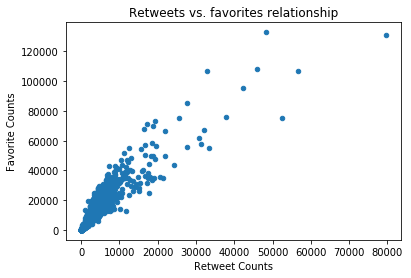

In [54]:
tw_master.plot(x="retweet_count", y="favorite_count", kind="scatter")

plt.title("Retweets vs. favorites relationship")
plt.ylabel("Favorite Counts")
plt.xlabel("Retweet Counts")

#### Q2: What is the dog stage counts?

Text(0,0.5,' ')

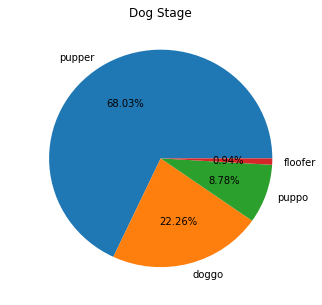

In [55]:
tw_master["dog_stage"].value_counts().plot(kind="pie", autopct= "%.2f%%", figsize=(5,5))
plt.title("Dog Stage")
plt.ylabel(" ")

### Conclusion

In this anlaysis, we have imported three different sources, then assessed it visually and programmatically. Also, we have cleaned it. At the end, we tried to depict some insights out of this given data. From the data, it is found a positive relation between the retweets counts and favorites. Also, the dogs in the pupper stage are the biggest and get most of the tweets. 

